<a href="https://colab.research.google.com/github/Jasleen8801/Computational-Statistics/blob/main/Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image 

# Common Functions Used

In [51]:
def mean(list):
  sum = 0
  for num in list:
    sum += int(num)
  avg = sum/len(list)
  return avg

In [52]:
def sum(list):
  sum = mean(list)*len(list)
  return sum

# 1) Linear Regression 

## Functions Used

In [53]:
def coeff(x, y):
  n = len(x)

  mean_x = mean(x)
  mean_y = mean(y)

  # b1_num = sum((x-mean_x)*(y-mean_y))
  # b1_den = sum((x-mean_x)**2)
  # b_1 = b1_num/b1_den

  SS_xy = sum(y*x) - n*mean_y*mean_x
  SS_xx = sum(x*x) - n*mean_x*mean_x

  b_1 = SS_xy / SS_xx
  b_0 = mean_y - b_1*mean_x

  return (b_0, b_1)

In [54]:
def plot_regr_line(x, y, b):
  plt.scatter(x, y, color="b")

  y_pred = b[0] + b[1]*x

  plt.plot(x, y_pred, color="r")

  plt.xlabel('x')
  plt.ylabel('y')

  plt.show()

In [55]:
def coeff_of_det(x, y):
  n = len(x)
  r2_num = (n*sum(x*y) - sum(x)*sum(y))**2
  r2_den = (n*sum(x*x) - (sum(x))**2) * (n*sum(y*y) - (sum(y))**2)
  r_2 = r2_num/r2_den
  return r_2

## Using Manual Calculations



#### Random Dataset

In [56]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [57]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 1.2363636363636363  
 b_1 = 1.1696969696969697
Coefficient of Determination: 0.952538038613988


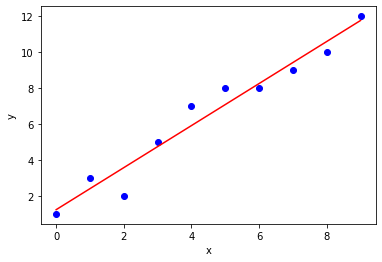

In [58]:
plot_regr_line(x, y, b)

#### Kaggle Dataset

In [59]:
data = pd.read_csv('Salary_Data.csv')
x = data['YearsExperience']
y = data['Salary']

In [60]:
b = coeff(x,y)
print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
print(f"Coefficient of Determination: {coeff_of_det(x,y)}")

Estimated coefficients:
 b_0 = 31650.50546021841  
 b_1 = 8990.370514820592
Coefficient of Determination: 1.2678138921682631


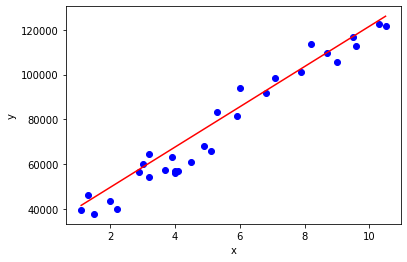

In [61]:
plot_regr_line(x, y, b)

## Using Inbuilt Functions

#### Random Dataset

In [62]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape((-1, 1))
y = np.array([1,3,2,5,7,8,8,9,10,12])

In [63]:
model = LinearRegression().fit(x, y)

In [64]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.952538038613988
intercept: 1.2363636363636363
slope: [1.16969697]


#### Kaggle Dataset

In [65]:
data = pd.read_csv('Salary_Data.csv')
x = np.array(data['YearsExperience']).reshape((-1, 1))
y = np.array(data['Salary'])

In [66]:
model = LinearRegression().fit(x, y)

In [67]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9569566641435086
intercept: 25792.200198668696
slope: [9449.96232146]


# 2) Variance inflation factor (VIF)


## Functions Used

In [68]:
def VIF(x, y):
  R_2 = coeff_of_det(x,y)
  VIF_value = 1 / (1 - R_2)
  return VIF_value

In [69]:
def predicted(x, b0, b1):
  y_pred = b_0 + b_1*x
  return y_pred

In [70]:
def SSR(y_mean, y_pred):
  SSR_value = sum((y_mean - y_pred)**2)
  return SSR_value

In [71]:
def SST(y_mean, y_i):
  SST_value = sum((y_i - y_mean)**2)
  return SST_value

In [72]:
def SSE(y_pred, y_i):
  SSR_value = sum((y_i - y_pred)**2)
  return SSR_value

## Using Manual Calculations

In [73]:
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
                             3, 4, 4, 4, 5, 5, 6, 7, 7, 8],
                   'score': [68, 76, 74, 80, 76, 78, 81, 84, 86, 83,
                             88, 85, 89, 94, 93, 94, 96, 89, 92, 97]})

y = df['score'].to_numpy()
x = df['hours'].to_numpy()

In [74]:
y_mean = mean(y)
b_0,b_1 = coeff(x,y)
y_pred = predicted(x, b_0, b_1)
# print(y_pred)

In [75]:
print(f"The SSR for the given model is: {SSR(y_mean, y_pred)}")
print(f"The SST for the given model is: {SST(y_mean, y)}")
print(f"The SSE for the given model is: {SSE(y_pred, y)}")
print(f"The VIF value is: {VIF(x, y)}")

The SSR for the given model is: 908.0
The SST for the given model is: 1239.0
The SSE for the given model is: 322.0
The VIF value is: 3.7712011914828465


# 3) Image Processing


In [76]:
image = Image.open('gray_img.jpg')
print(image.format)
print(image.size)
print(image.mode)

PNG
(500, 375)
RGBA


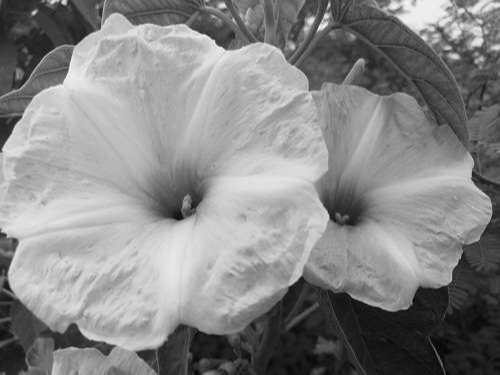

In [77]:
image

In [78]:
numpydata = np.asarray(image)
print(type(numpydata))
print(numpydata.shape)
# print(numpydata)

<class 'numpy.ndarray'>
(375, 500, 4)


In [79]:
noise = np.random.normal(0, .1, numpydata.shape)
new_data = noise + numpydata
# print(new_data)

In [80]:
im = Image.fromarray((new_data * 255).astype(np.uint8))
print(im.mode)
print(im.size)
print(type(im))

RGBA
(500, 375)
<class 'PIL.Image.Image'>


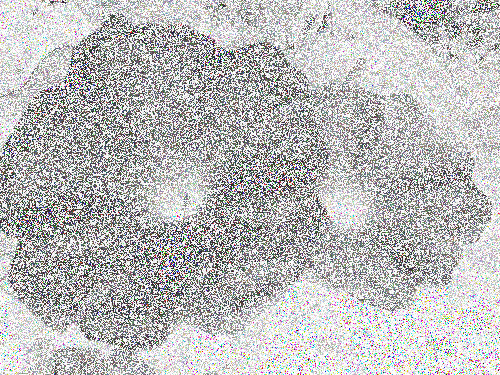

In [81]:
im

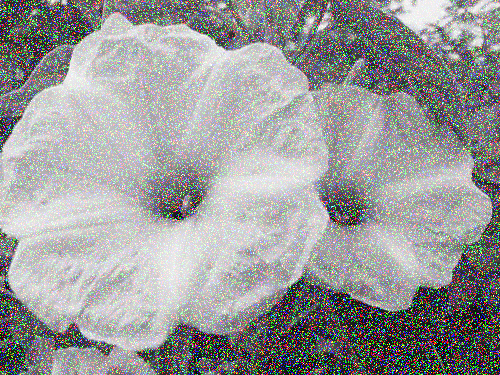

-1

In [86]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
cv2.waitKey(0)

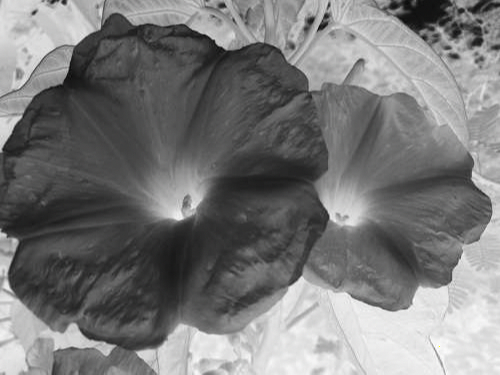

In [83]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')
numpyData = np.asarray(img)
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
# img_gauss = cv2.add(img,gauss)
newData = gauss + img
# Display the image
im = Image.fromarray((newData * 255).astype(np.uint8))
im
# cv2_imshow(img_gauss)
# cv2.imshow('a',img_gauss)
# cv2.waitKey(0)

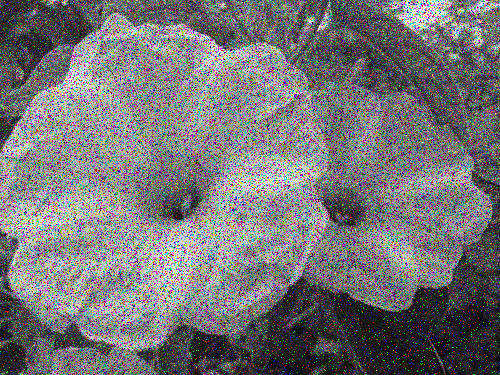

In [84]:
from google.colab.patches import cv2_imshow, cv2
import numpy as np

img = cv2.imread('gray_img.jpg')

gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss

cv2_imshow(noise)
# cv2.waitKey(0)